Jag måste säga att jag inte har riktig koll än men det kommer. Jag har fått hjälp av min polare Jakob Bergman med en del kod och ganska mycket förklaringar om hur de olika koncepten fungerar. Jag har fortfarande svårt för att riktigt förstå hur numpy fungerar och hur txt-filen strippas så att det bara blir hanterbar data kvar. (kanske har gjort helt fel...)

Fick "skäll" av mitt minsta barn som undrade varför jag blandat in Pichu och förklarade att det var ologiskt att det var Pichu som var med Pikachu eftersom det är Raichu som faktiskt är Pikachus utveckling. Då stämmer det också med färgerna jag valt (gul=Pikachu - orange=Raichu). Jag förstår att specen till uppgiften inte såg ut så men för att glädja mitt barn ändrade jag.

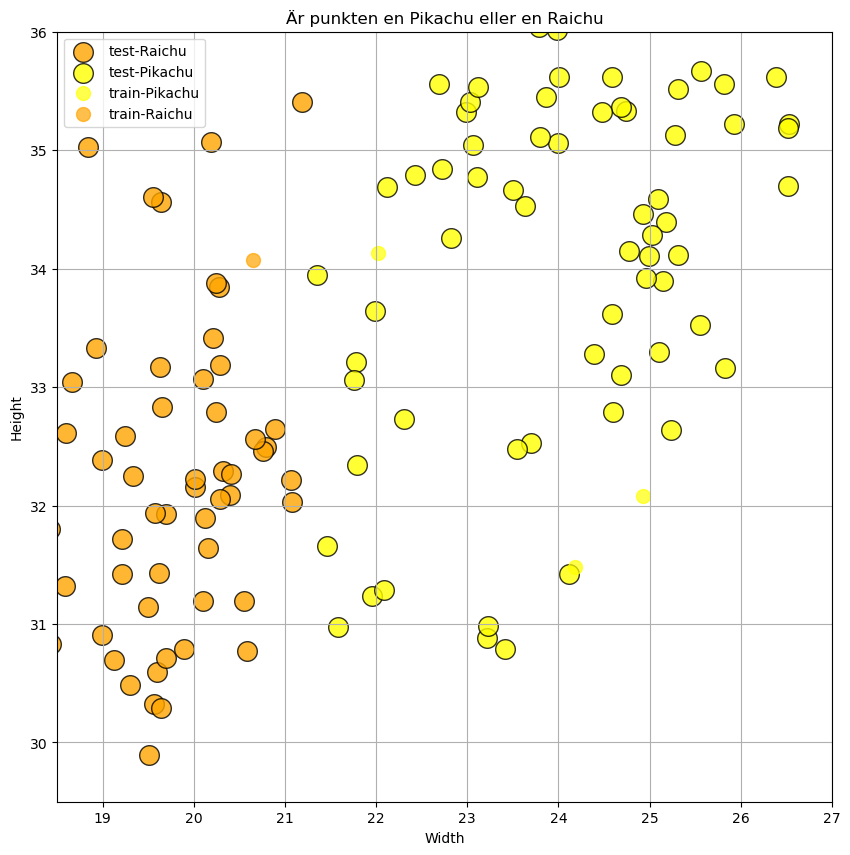

In [5]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt

# Grundpunkter (width, height, label)
train_data = [
    (25.0, 32.0, 'Pikachu'),
    (24.2, 31.5, 'Pikachu'),
    (22.0, 34.0, 'Pikachu'),
    (20.5, 34.0, 'Raichu'),
]

# Använd numpy för att hantera datan - Jakobs hjälp
train_coords = np.array([(x, y) for x, y, _ in train_data])
train_labels = np.array([label for _, _, label in train_data])

# Läs testpunkter från fil (datapoints.txt) - Fick söka info på nätet
test_points = []
fp = 'datapoints.txt'
if os.path.exists(fp):
    with open(fp, 'r', encoding='utf-8') as f:
        for line in f:
            s = line.strip()
            if not s:
                continue
            nums = re.findall(r'[-+]?\d*\.\d+|\d+', s)
            if len(nums) >= 2:
                test_points.append((float(nums[0]), float(nums[1])))
            else:
                print("Kan inte tolka raden i datapoints.txt:", s)

# Klassificering med numpy - Jakobs hjälp
def classify_point(x, y, k=1):
    point = np.array([x, y])
    distances = np.linalg.norm(train_coords - point, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = train_labels[nearest_indices]

    values, counts = np.unique(nearest_labels, return_counts=True)
    return values[np.argmax(counts)]

# Klassificera testpunkterna
k = 1
test = [(x, y, classify_point(x, y, k=k)) for (x, y) in test_points]

# Plotta punkterna
colors = {'Pikachu': 'yellow', 'Raichu': 'orange'}
plt.figure(figsize=(10, 10))

# Separera punkter som ligger nära för bättre tydlighet - Fick söka info på nätet
jitter = 0.2
train_coords_jitter = train_coords + np.random.uniform(-jitter, jitter, train_coords.shape)

# Testpunkter
for label in {lbl for _, _, lbl in test}:
    g = [(x, y) for (x, y, l) in test if l == label]
    xs, ys = zip(*g)
    plt.scatter(xs, ys,
                label=f"test-{label}",
                color=colors.get(label, 'gray'),
                edgecolors='black',
                s=200,
                alpha=0.8,
                marker='o')

# Träningspunkter
for label in set(train_labels):
    g = train_coords_jitter[train_labels == label]
    xs, ys = g[:, 0], g[:, 1]
    plt.scatter(xs, ys,
                label=f"train-{label}",
                color=colors.get(label, 'gray'),
                s=100,
                alpha=0.7,
                marker='o')

# Zooma ut lite för bättre tydlighet - Fick söka info på nätet
plt.xlim(min(train_coords[:,0]) - 2, max(train_coords[:,0]) + 2)
plt.ylim(min(train_coords[:,1]) - 2, max(train_coords[:,1]) + 2)

plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Är punkten en Pikachu eller en Raichu')
plt.legend()
plt.grid(True)
plt.show()


Användarinmatning av testpunkter. Låt samma algoritm avgöra punkternas klass. Ha med felhantering som tar hand om negativa tal och inputs som inte är numeriska. Tydliga  felmeddelanden.

Punkten (23.0, 23.0) är en: Pikachu!


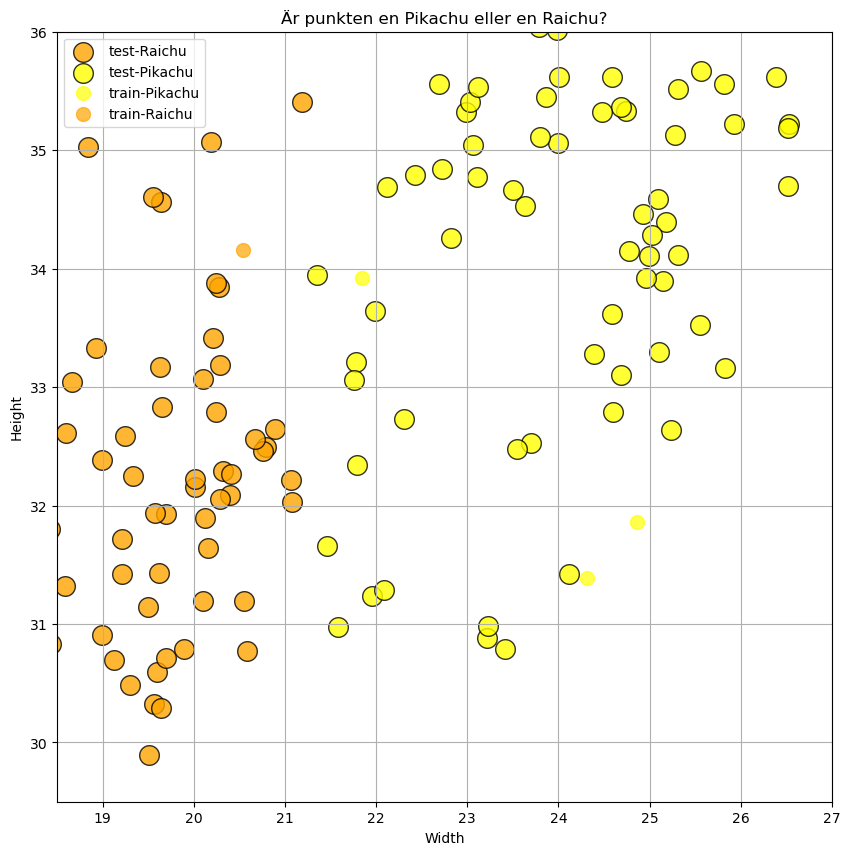

In [4]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt

# Grundpunkter (width, height, label)
train_data = [
    (25.0, 32.0, 'Pikachu'),
    (24.2, 31.5, 'Pikachu'),
    (22.0, 34.0, 'Pikachu'),
    (20.5, 34.0, 'Raichu'),
]

# Använd numpy för att hantera datan - Jakobs hjälp
train_coords = np.array([(x, y) for x, y, _ in train_data])
train_labels = np.array([label for _, _, label in train_data])

# Läs testpunkter från fil (datapoints.txt) - Fick söka info på nätet
test_points = []
fp = 'datapoints.txt'
if os.path.exists(fp):
    with open(fp, 'r', encoding='utf-8') as f:
        for line in f:
            s = line.strip()
            if not s:
                continue
            nums = re.findall(r'[-+]?\d*\.\d+|\d+', s)
            if len(nums) >= 2:
                test_points.append((float(nums[0]), float(nums[1])))
            else:
                print("Kan inte tolka raden i datapoints.txt:", s)

# Klassificering med numpy - Jakobs hjälp
def classify_point(x, y, k=1):
    point = np.array([x, y])
    distances = np.linalg.norm(train_coords - point, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = train_labels[nearest_indices]

    values, counts = np.unique(nearest_labels, return_counts=True)
    return values[np.argmax(counts)]

# Användarinmatning - Jakobs hjälp men mina felmeddelanden
try:
    x_str = input("Mata in bredd (width): ")
    y_str = input("Mata in höjd (height): ")

    user_x = float(x_str)
    user_y = float(y_str)

    if user_x < 0 or user_y < 0:
        print("Tyvärr så gillar inte Pikachu och Raichu kalla tal. Försök igen med ett tal på andra sidan nollan.")
    else:
        klass = classify_point(user_x, user_y)
        print(f"Punkten ({user_x}, {user_y}) är en: {klass}!")

except ValueError:
    print("Vilken otur du har, det där påminner väldigt mycket om en bokstav (endast siffror t.ex. 11 eller 11.1).")

# Klassificera testpunkterna
k = 1
test = [(x, y, classify_point(x, y, k=k)) for (x, y) in test_points]

# Plotta punkterna
colors = {'Pikachu': 'yellow', 'Raichu': 'orange'}
plt.figure(figsize=(10, 10))

# Testpunkter
for label in {lbl for _, _, lbl in test}:
    g = [(x, y) for (x, y, l) in test if l == label]
    xs, ys = zip(*g)
    plt.scatter(xs, ys,
                label=f"test-{label}",
                color=colors.get(label, 'gray'),
                edgecolors='black',
                s=200,
                alpha=0.8,
                marker='o')

# Träningspunkter
for label in set(train_labels):
    g = train_coords_jitter[train_labels == label]
    xs, ys = g[:, 0], g[:, 1]
    plt.scatter(xs, ys,
                label=f"train-{label}",
                color=colors.get(label, 'gray'),
                s=100,
                alpha=0.7,
                marker='o')

# Zooma ut lite för bättre tydlighet - Fick söka info på nätet
plt.xlim(min(train_coords[:,0]) - 2, max(train_coords[:,0]) + 2)
plt.ylim(min(train_coords[:,1]) - 2, max(train_coords[:,1]) + 2)

plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Är punkten en Pikachu eller en Raichu?')
plt.legend()
plt.grid(True)
plt.show()


Så som klassificeringen är gjord nu med närmaste punkt kan ibland bli fel när punkterna för respektive klass går in i varandra. Använde de 10 närmaste punkterna och låt majoritetsomröstning avgöra vilken klass den inmatade punkten tillhör. Ändrar k=1 till k=10 för alla punkter.

Punkten (43.0, 25.0) är en: Pikachu!


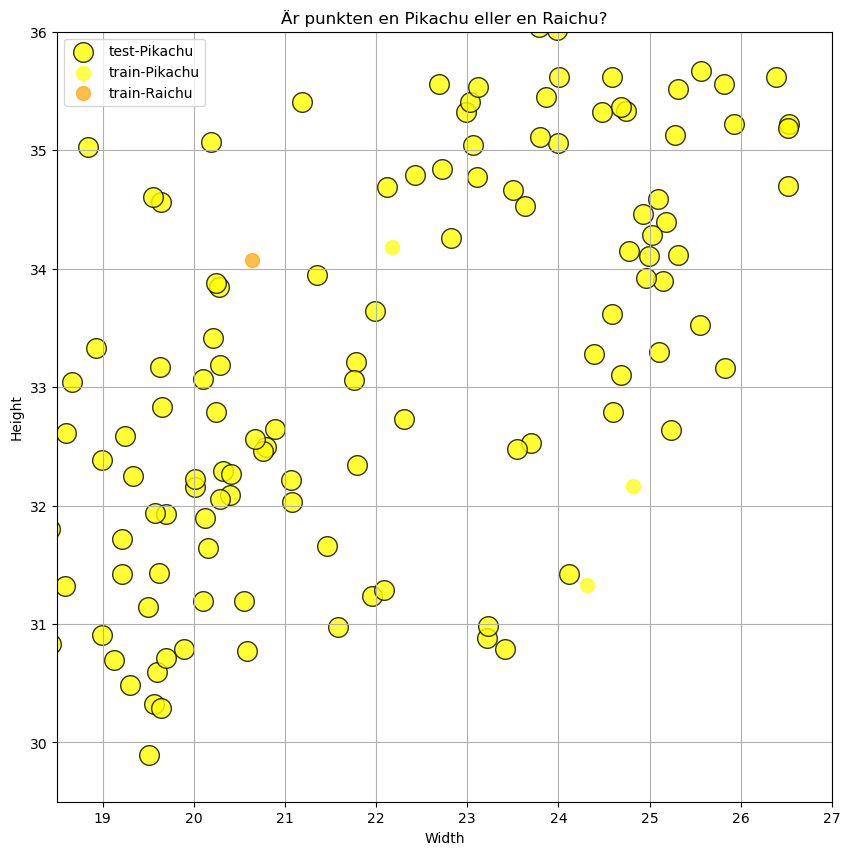

In [6]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt

# Grundpunkter (width, height, label)
train_data = [
    (25.0, 32.0, 'Pikachu'),
    (24.2, 31.5, 'Pikachu'),
    (22.0, 34.0, 'Pikachu'),
    (20.5, 34.0, 'Raichu'),
]

# Använd numpy för att hantera datan - Jakobs hjälp
train_coords = np.array([(x, y) for x, y, _ in train_data])
train_labels = np.array([label for _, _, label in train_data])

# Läs testpunkter från fil (datapoints.txt) - Fick söka info på nätet
test_points = []
fp = 'datapoints.txt'
if os.path.exists(fp):
    with open(fp, 'r', encoding='utf-8') as f:
        for line in f:
            s = line.strip()
            if not s:
                continue
            nums = re.findall(r'[-+]?\d*\.\d+|\d+', s)
            if len(nums) >= 2:
                test_points.append((float(nums[0]), float(nums[1])))
            else:
                print("Kan inte tolka raden i datapoints.txt:", s)

# Klassificering med numpy - Jakobs hjälp
def classify_point(x, y, k=1):
    point = np.array([x, y])
    distances = np.linalg.norm(train_coords - point, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = train_labels[nearest_indices]

    values, counts = np.unique(nearest_labels, return_counts=True)
    return values[np.argmax(counts)]

# Användarinmatning - Jakobs hjälp men mina felmeddelanden
try:
    x_str = input("Mata in bredd (width): ")
    y_str = input("Mata in höjd (height): ")

    user_x = float(x_str)
    user_y = float(y_str)

    if user_x < 0 or user_y < 0:
        print("Tyvärr så gillar inte Pikachu och Raichu kalla tal. Försök igen med ett tal på andra sidan nollan.")
    else:
        klass = classify_point(user_x, user_y, k=10)
        print(f"Punkten ({user_x}, {user_y}) är en: {klass}!")

except ValueError:
    print("Vilken otur du har, det där påminner väldigt mycket om en bokstav (endast siffror t.ex. 11 eller 11.1).")

# Klassificera testpunkterna
k = 10
test = [(x, y, classify_point(x, y, k=k)) for (x, y) in test_points]

# Plotta punkterna
colors = {'Pikachu': 'yellow', 'Raichu': 'orange'}
plt.figure(figsize=(10, 10))

# Träningspunkter behöver lite jitter för att inte överlappa exakt
jitter = 0.2
train_coords_jitter = train_coords + np.random.uniform(-jitter, jitter, train_coords.shape)

# Testpunkter - Jakobs hjälp och sökt info på nätet
for label in {lbl for _, _, lbl in test}:
    g = [(x, y) for (x, y, l) in test if l == label]
    xs, ys = zip(*g)
    plt.scatter(xs, ys,
                label=f"test-{label}",
                color=colors.get(label, 'gray'),
                edgecolors='black',
                s=200,
                alpha=0.8,
                marker='o')

# Träningspunkter - Jakobs hjälp och sökt info på nätet
for label in set(train_labels):
    g = train_coords_jitter[train_labels == label]
    xs, ys = g[:, 0], g[:, 1]
    plt.scatter(xs, ys,
                label=f"train-{label}",
                color=colors.get(label, 'gray'),
                s=100,
                alpha=0.7,
                marker='o')

# Zooma ut lite för bättre tydlighet - Fick söka info på nätet
plt.xlim(min(train_coords[:,0]) - 2, max(train_coords[:,0]) + 2)
plt.ylim(min(train_coords[:,1]) - 2, max(train_coords[:,1]) + 2)

plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Är punkten en Pikachu eller en Raichu?')
plt.legend()
plt.grid(True)
plt.show()


Jag känner att jag får lite mer koll ju mer jag håller på. Tyvärr går det inte lika fort fram för mig som jag vill men jag tycker att det är väldigt kul än så länge.